2023-04-10 17:53:03.758790: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 17:53:05.866764: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 17:53:05.874981: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 17:53:10.015045: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/5
2250/2250 [==============================] - 6s 2ms/step - loss: 0.0878 - accuracy: 0.9782 - val_loss: 0.0613 - val_accuracy: 0.9877
Epoch 2/5
2250/2250 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9862 - val_loss: 0.0597 - val_accuracy: 0.9880
Epoch 3/5
2250/2250 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9867 - val_loss: 0.0584 - val_accuracy: 0.9874
Epoch 4/5
2250/2250 [==============================] - 4s 2ms/step - loss: 0.0626 - accuracy: 0.9872 - val_loss: 0.0564 - val_accuracy: 0.9885
Epoch 5/5
625/625 [==============================] - 1s 1ms/step - loss: 0.0612 - accuracy: 0.9880
Test Loss: 0.061199676245450974, Test Accuracy: 0.9879999756813049
625/625 [==============================] - 1s 1ms/step






======================================== Performance Metrics ======================================== 
Accuracy: 0.988
Precision: 1.0
Recall: 0.8779867819013727
F1-score: 0.9350297780184083
Confusion M

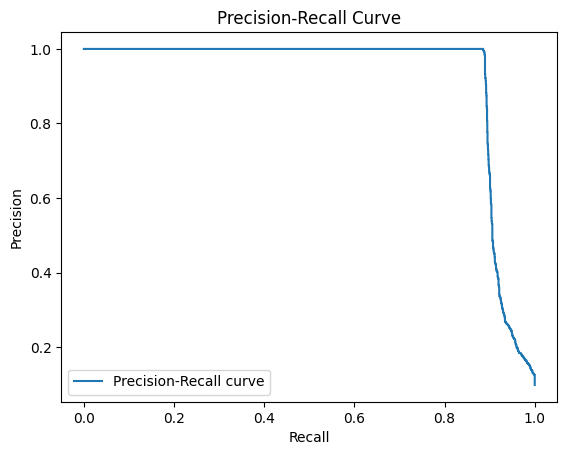

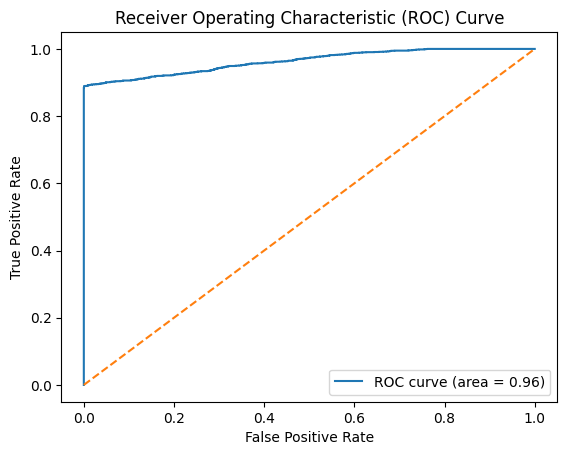





======================================== Result Analysis Charts ======================================== 


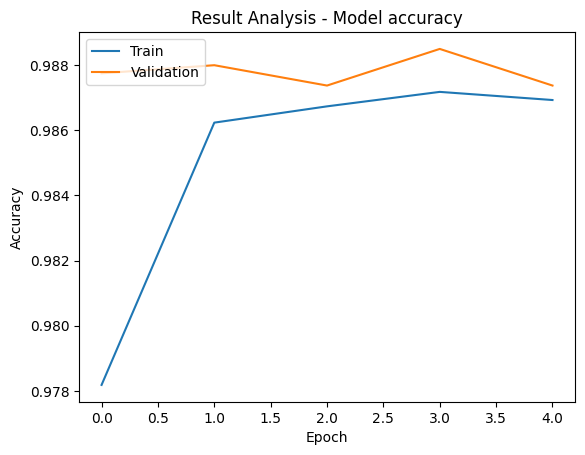

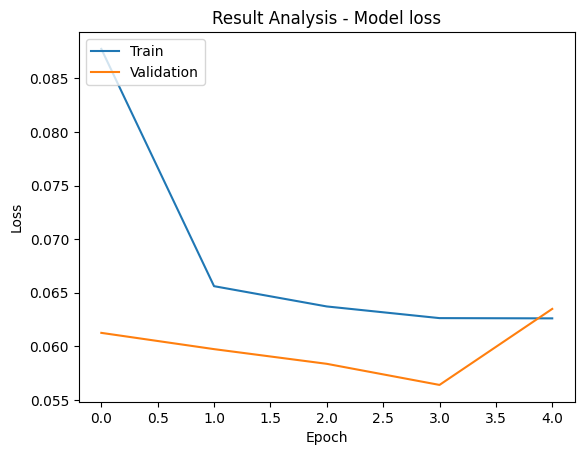

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'data.csv' with the path to your dataset)
data = pd.read_csv('sample_Datasets.csv')

# Preprocess the data
# Convert Time of Day to seconds
data['Time of Day'] = pd.to_datetime(data['Time of Day']).dt.hour * 3600 + pd.to_datetime(data['Time of Day']).dt.minute * 60 + pd.to_datetime(data['Time of Day']).dt.second

# One-hot encode the 'Location' and 'Purchase' columns
data = pd.get_dummies(data, columns=['Location', 'Transaction'])

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
data[['Amount', 'Time of Day']] = scaler.fit_transform(data[['Amount', 'Time of Day']])

# Split the data into training and testing sets
X = data.drop(columns=['Fraudulent'])
y = data['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Build the ANN model
input_shape = X_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
model.save("my_model.h5")

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print('\n')
print('\n')
print('\n')
print('======================================== Performance Metrics ======================================== ')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion Matrix:\n {conf_mat}')
print('\n')
print('\n')
# input("Press Enter to continue...")

import matplotlib.pyplot as plt

# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


print('======================================== Performance Analysis Charts ======================================== ')

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

# Calculate probability scores for the positive class
y_scores = model.predict(X_test)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute ROC curve and AUC (Area Under the Curve)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve:
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# ROC curve:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


print('\n')
print('\n')



print('======================================== Result Analysis Charts ======================================== ')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Result Analysis - Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Result Analysis - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()












